In [1]:
%reload_ext autoreload
%autoreload 2

## Optimize a dia-PASEF method in Jupyter notebook

In [2]:
import pydiaid.diapasef.cli as cli #todo

In [18]:
method_conf = {
    "input": {
        "save_at": r"D:\test_optimization",
        "PTM": "None",
        "library_name": r"D:\pydiaid\pydiaid\pydiaid\diapasef\static\AlphaPept_results.csv",
        "analysis_software": "AlphaPept",
    },
    "method_parameters": {
        "mz": [300,1200],
        "ion_mobility": [0.6,1.6],
        "num_dia_pasef_scans": 20,
        "im_steps": 2,
        "overlap": 0,
        "shift_of_final_method": 0,
    },
    "graphs": {
        "plot_mz": [250, 1250],
        "plot_IM": [0.6, 1.6],
        "numbins": 100,
        "window_frame_color": "black",
        "window_color": "white",
        "window_transparency": 0.5
    },
    "optimizer": {
        "optimizer": "Gauss",
        "n_calls": 5, #todo set to 100
        "initial_points": 2, #todo set to 20
        "YA1": [0.5, 0.9],
        "YA2": [0.6, 1.0],
        "YB1": [0.9, 1.5],
        "YB2": [1.0, 1.8],
        "evaluation_parameter": "No. of covered precursors"
    }
}

In [19]:
cli.run_all(
    method_conf
)

# The output can be found in the folder specified at "save_at".

{'precursors within m/z-range [%]': 97.59}
RUN WITH: [0.8764463330166317, 1.2630948905498791, 1.8024002131993178, 1.9073791106769722] | RESULT: 9758.0
RUN WITH: [0.8009630510739123, 1.1871295463646983, 1.5705559417639372, 1.629699477934951] | RESULT: 9912.0
RUN WITH: [0.854409300586086, 1.3363332937194896, 1.4018092556083424, 1.4648813487076182] | RESULT: 10285.0
RUN WITH: [0.8845853269978934, 1.280953367742227, 1.285317473127582, 1.418751914029719] | RESULT: 10847.0
RUN WITH: [0.7694987482402109, 1.1605328631452716, 1.6851513689467232, 1.5708094119528933] | RESULT: 10304.0
########
BEST RESULT
INPUT: [0.8845853269978934, 1.280953367742227, 1.285317473127582, 1.418751914029719]
OUTPUT: 10847.0
########


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
import pydiaid.diapasef.loader as loader

In [21]:
method_conf["input"]["PTM"] = ["c","ox"]

In [22]:
loader.load_library(
    method_conf["input"]["library_name"],
    method_conf["input"]["analysis_software"],
    method_conf["input"]["PTM"]
)

,mz,IM,Charge,Proteins,Peptide
0,1160.076668,1.300847,2.0,sp|Q13151|ROA0_HUMAN,GHFEAFGTLTDcCVVVVNPQTK_2
1,983.759064,1.035638,3.0,sp|P06748|NPM_HUMAN,aMEDSMDMDMSPLRPQNYLFGcCELK_3
2,994.425313,1.027455,3.0,sp|P06748|NPM_HUMAN,aMEDSoxMDoxMDMSPLRPQNYLFGcCELK_3
3,999.756379,1.039554,3.0,sp|P06748|NPM_HUMAN,aMEDSoxMDoxMDoxMSPLRPQNYLFGcCELK_3
4,1208.091716,1.315002,2.0,sp|P07900|HS90A_HUMAN,VFIMDNcCEELIPEYLNFIR_2
...,...,...,...,...,...
5731,746.687593,1.017635,2.0,sp|Q9H2Z4|NKX24_HUMAN,FMGPSAGVNVAGoxMGSLTGIADAAK_2
5732,1138.590927,1.264702,2.0,sp|P05164|PERM_HUMAN,LFEQVoxMRIGLDLPALNoxMQR_2
5733,765.030461,0.953376,3.0,sp|Q9P003|CNIH4_HUMAN,YIMVPSGNoxMGVFDPTEIHNR_3
5734,765.031268,0.937342,3.0,sp|Q9P003|CNIH4_HUMAN,YIoxMVPSGNMGVFDPTEIHNR_3


## Here, we present the method evaluation steps:

In [23]:
import pandas as pd
import pydiaid.diapasef.loader as loader
import pydiaid.diapasef.graphs as graphs

#### Loading of the dia-PASEF method and the AlphaPept library.

In [24]:
lib_name = method_conf["input"]["library_name"]
dia_PASEF = r"D:\pydiaid\pydiaid\pydiaid\diapasef\static\diaPASEF_method.txt"

In [25]:
df_parameters_final = pd.read_csv(
        dia_PASEF,
        skiprows=4,
        names=["MS Type", "Cycle Id", "Start IM", "End IM", "Start Mass", "End Mass", "CE"]
        )

In [26]:
dataframe = pd.read_csv(lib_name)  # .xls, .tsv, .txt
lib = loader.__parse_alpha_pept(dataframe, 'None')

#### Generating plots that belong only to the library.

In [27]:
x, y, z = graphs.kernel_density_calculation(
    lib,
    100,
)

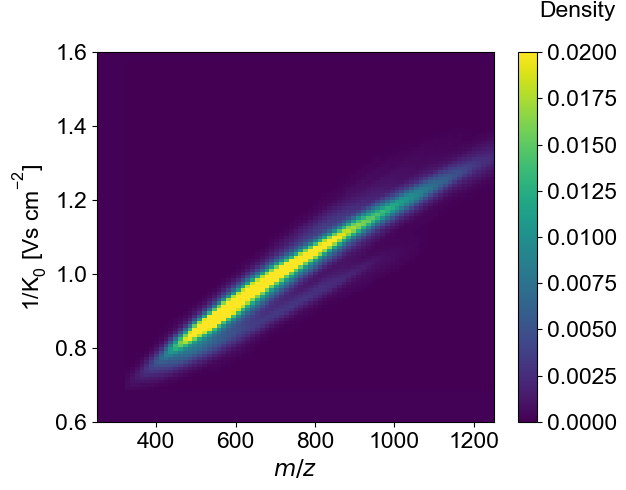

In [28]:
plt_proteomics = graphs.plot_density(
    x,
    y,
    z,
    method_conf["graphs"],
    method_conf["input"]["save_at"]+r"/Plot_proteomics_precursors.pdf",
    gui = True
)

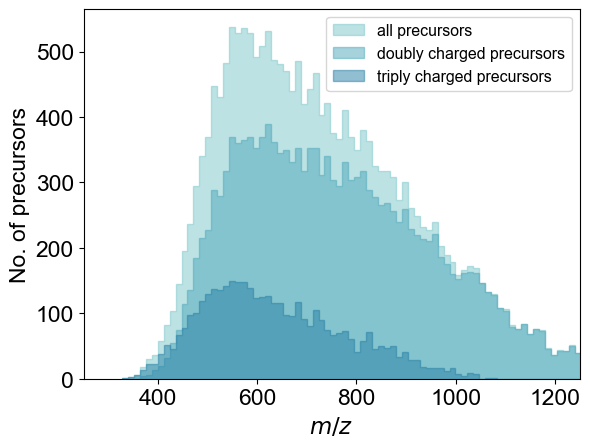

In [29]:
hist_mz = graphs.plot_precursor_distribution_as_histogram(
    lib,
    method_conf["graphs"],
    method_conf["input"]["save_at"]+r"\histogram_proteomics_precursors_mz.pdf",
    gui = True    
)

#### Plotting the dia-PASEF method on top of the kernel density distribution.

In [30]:
import panel as pn
pn.extension()

In [31]:
save_figure_at = method_conf["input"]["save_at"]+"\Plot_method.png"

graphs.plot_density_and_method(
    df_parameters_final,
    x,
    y,
    z,
    method_conf["graphs"],
    save_figure_at,
)

<Figure size 640x480 with 0 Axes>

PNG(str, align='center', height=345, margin=(0, 20, 0, 0), sizing_mode='fixed', width=460)
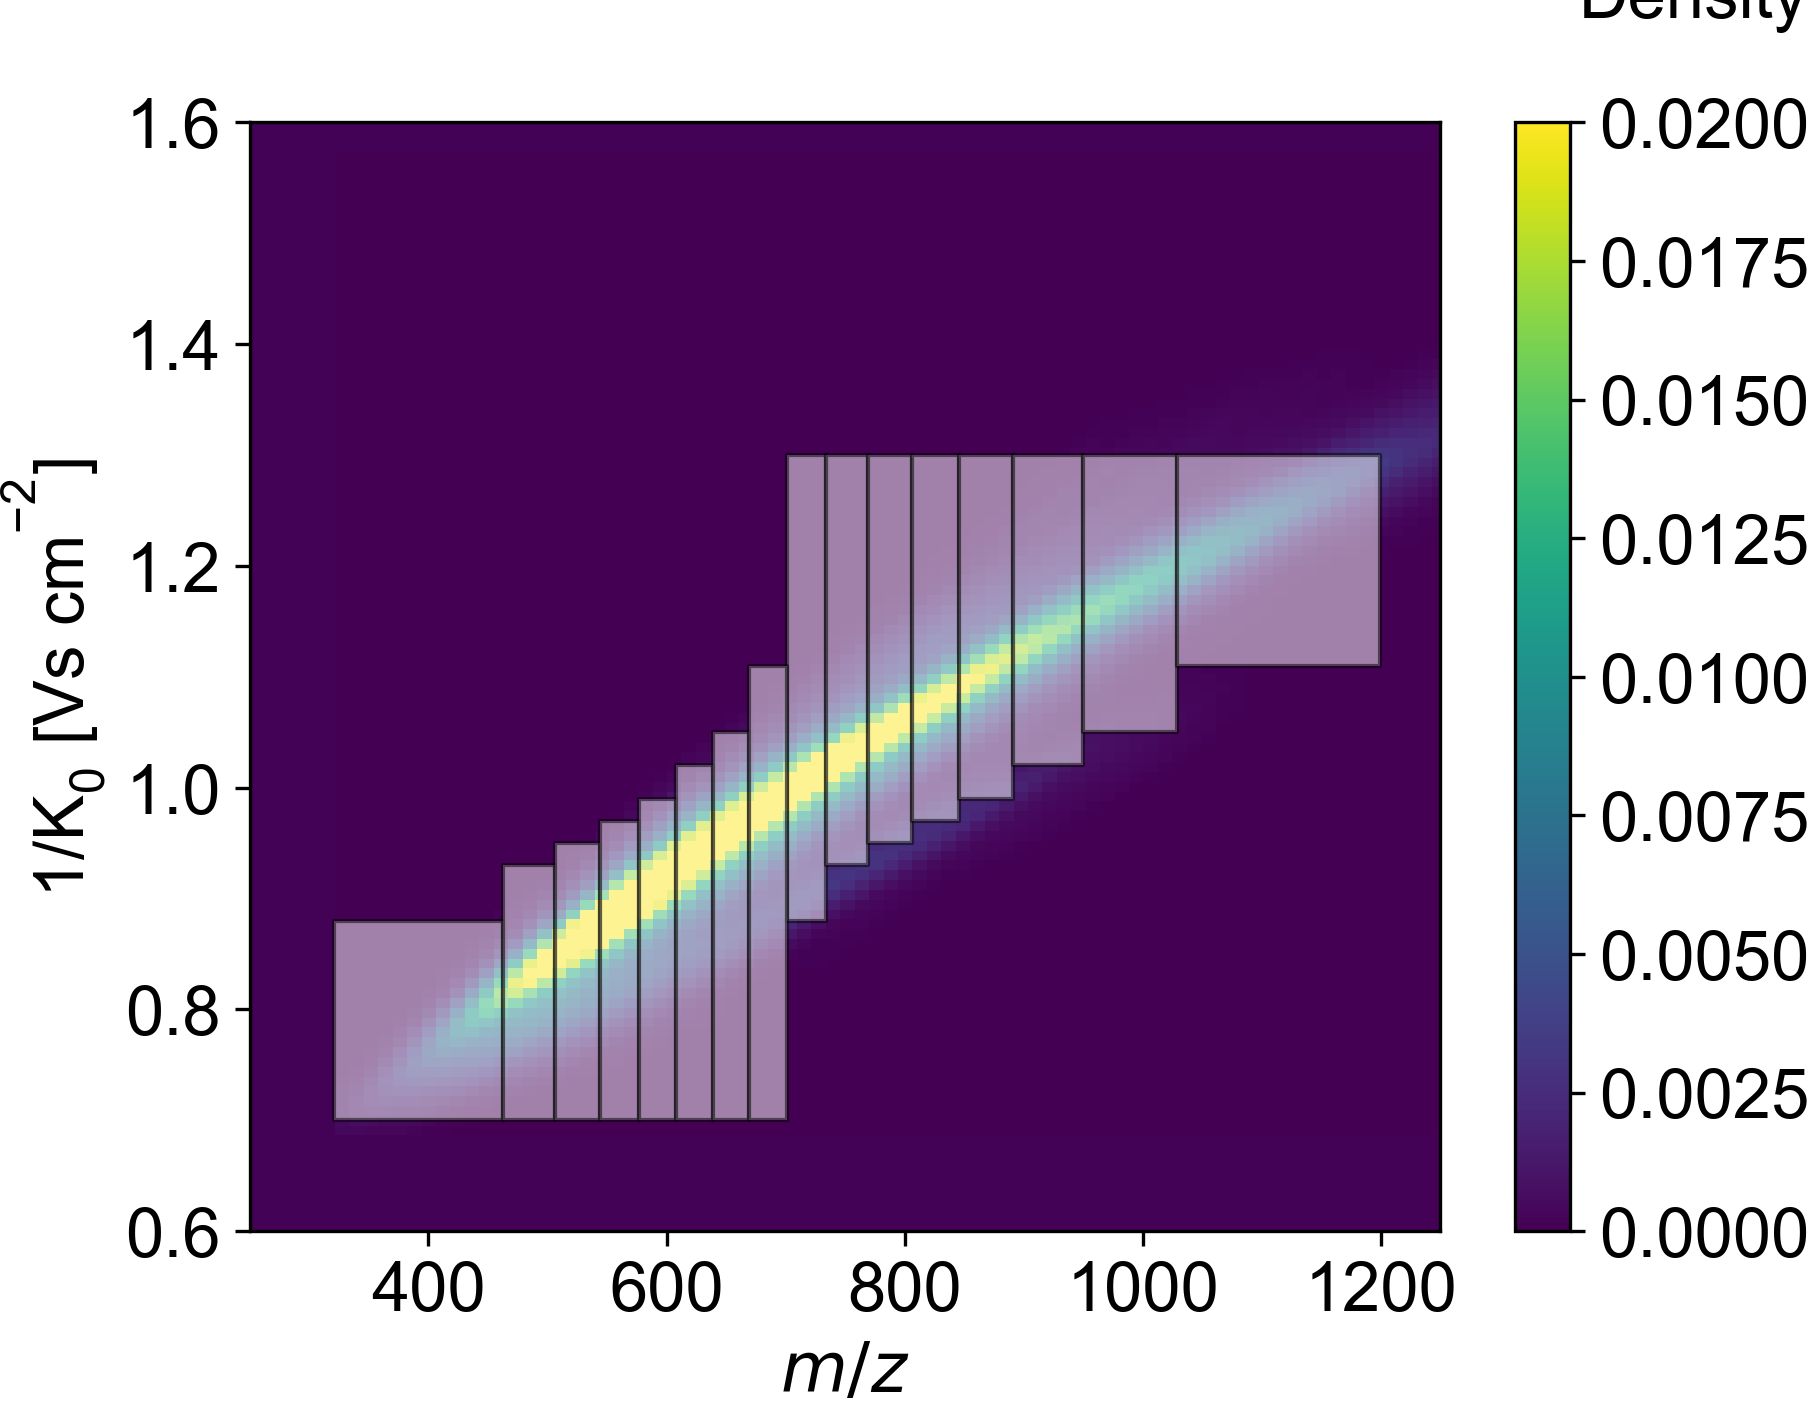

In [32]:
pn.pane.PNG(
    save_figure_at,
    height=345,
    width=460,
    align='center',
    margin=(0, 20, 0, 0)
)

#### Evaluate the die-PASEF method.

In [34]:
import pydiaid.diapasef.method_evaluation as evaluator

In [35]:
dict_coverage = evaluator.coverage(
    df_parameters_final,
    lib,
)
dict_coverage

{'unique proteins in the library': 3420,
 'unique precursors in the library': 19998,
 'smallest diaPASEF window': 30.05,
 'biggest diaPASEF window': 171.11,
 'average diaPASEF window size': 54.92,
 'No. of covered proteins': 3393,
 'No. of covered precursors': 19004,
 'all proteins covered': '99.2%',
 'all precursors covered': '95.0%',
 'No. of covered, doubly charged precursors': 14933,
 'all doubly charged precursors covered': '96.1%',
 'No. of covered, triply charged precursors': 3662,
 'all triply charged precursors covered': '90.7%',
 'No. of covered, quadruply charged precursors': 233,
 'all quadruply charged precursors covered': '97.9%',
 'No. of covered, singly charged precursors': 171,
 'all singly charged precursors covered': '94.5%'}